<a href="https://colab.research.google.com/github/Sudhir956020/DL_CNN/blob/main/CNN_dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kumarsudhir105","key":"51e7b8b92b23ac83ef99d0a9a7f81d7b"}'}

In [2]:
!pip install kaggle



In [3]:
!mkdir -p ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 158MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.7MB/s]


In [7]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [9]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/train',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/test',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
for i in train_ds:
    print(i)

Streaming output truncated to the last 5000 lines.
        [[149.861    , 152.861    , 135.861    ],
         [150.88672  , 153.88672  , 136.88672  ],
         [151.07422  , 154.07422  , 137.07422  ],
         ...,
         [192.84766  , 198.9961   , 175.61328  ],
         [197.6211   , 200.9639   , 175.21484  ],
         [192.94693  , 195.39062  , 170.20474  ]],

        ...,

        [[228.67578  , 206.67578  , 182.67578  ],
         [228.       , 208.       , 183.       ],
         [227.90598  , 207.90598  , 183.90598  ],
         ...,
         [188.6836   , 171.6836   , 143.6836   ],
         [191.57031  , 174.57031  , 146.57031  ],
         [193.75552  , 176.75552  , 148.75552  ]],

        [[226.52988  , 204.52988  , 180.52988  ],
         [227.2537   , 207.2537   , 182.2537   ],
         [228.       , 208.       , 184.       ],
         ...,
         [193.76562  , 176.76562  , 148.76562  ],
         [191.39432  , 174.39432  , 146.39432  ],
         [191.52988  , 174.52988  , 146

In [11]:

model=Sequential()

In [12]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [15]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)


Epoch 1/2
625/625 [==============================] - 65s 84ms/step - loss: 3.1957 - accuracy: 0.5752 - val_loss: 0.6780 - val_accuracy: 0.5900
Epoch 2/2
625/625 [==============================] - 55s 88ms/step - loss: 0.6132 - accuracy: 0.6680 - val_loss: 0.6353 - val_accuracy: 0.6524


In [16]:
import matplotlib.pyplot as plt


In [18]:
dog_image=plt.imread(r"/content/dog.1.jpg")


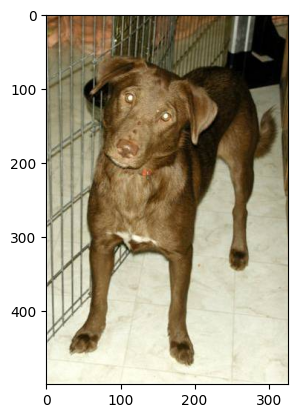

In [19]:
plt.imshow(dog_image)


In [20]:
cat_image=plt.imread(r"/content/cat.1.jpg")


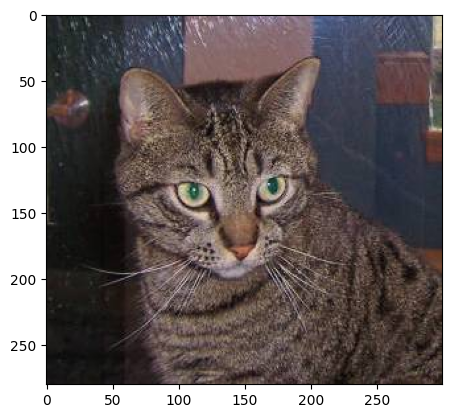

In [21]:
plt.imshow(cat_image)


In [22]:
dog_image.shape


(499, 327, 3)

In [23]:
cat_image.shape


(280, 300, 3)

In [24]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [25]:
dog_resize.shape


(256, 256, 3)

In [26]:
cat_resize.shape


(256, 256, 3)

In [27]:
dog_resize=dog_resize.reshape((1,256,256,3))


In [28]:
dog_resize.shape


(1, 256, 256, 3)

In [29]:
cat_resize=cat_resize.reshape((1,256,256,3))


In [30]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 254ms/step


In [31]:
pred

array([[0.8554878]], dtype=float32)

In [32]:
model.predict(cat_resize)


1/1 [==============================] - 0s 25ms/step


array([[0.4523614]], dtype=float32)

In [33]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog


In [34]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

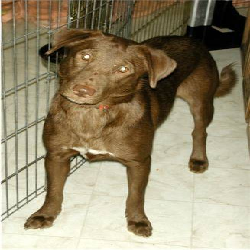

In [46]:
image.load_img(r"/content/dog.1.jpg",target_size=(250,250))

In [47]:
myimg=image.load_img(r"/content/dog.1.jpg",target_size=(250,250))

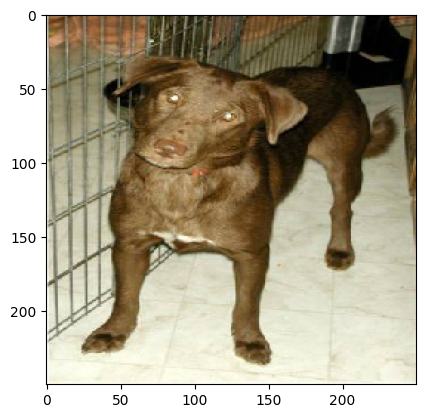

In [48]:
plt.imshow(myimg)

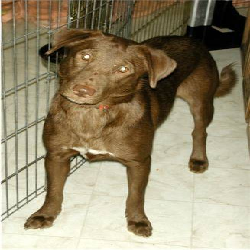

In [49]:
myimg

In [39]:
  type(myimg)

PIL.Image.Image

In [40]:
img=image.img_to_array(myimg)

In [41]:
type(img)

numpy.ndarray

In [42]:
datagen=ImageDataGenerator(
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [43]:
img.shape

(250, 250, 3)

In [44]:
input_image=img.reshape(1,250,250,3)

In [50]:
i=0
for output in datagen.flow(input_image,save_to_dir="/content/augmented_image"):
  i=i+1

  if i ==10:
    break

In [55]:
#flow for single image augmention
#flow from directory for entire folder image augmention

In [51]:
train_datagen=ImageDataGenerator(
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1./255


)

In [55]:
train_generator=train_datagen.flow_from_directory(
    "/content/train",
    target_size=(150,150),
    batch_size=15,
    class_mode="binary"
)

Found 20000 images belonging to 2 classes.


In [54]:
test_datagen=ImageDataGenerator(

    rescale=1./255

)

In [56]:
test_generator=test_datagen.flow_from_directory(
    "/content/test",
    target_size=(150,150),
    batch_size=15,
    class_mode="binary"
)

Found 5000 images belonging to 2 classes.


In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [59]:
model=Sequential()

In [60]:
# this is my first convolution layer
model.add(Conv2D(24,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(36,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(48,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(64,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(32,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [61]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [62]:
model.fit_generator(train_generator,epochs=2,validation_data=test_generator)


<ipython-input-62-be1b953e7938>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,epochs=2,validation_data=test_generator)


Epoch 1/2
1334/1334 [==============================] - 165s 121ms/step - loss: 0.6244 - accuracy: 0.6446 - val_loss: 0.5632 - val_accuracy: 0.7272
Epoch 2/2
1334/1334 [==============================] - 164s 123ms/step - loss: 0.5258 - accuracy: 0.7353 - val_loss: 0.4809 - val_accuracy: 0.7670
